# Logistic Regression
## Question:
**Can the `y` be determined by `x`?**
- Can `profit` be determine by `sales`? (had `profit` is either Yes or No)
- Can `credit` be determined by `score`? (got `credit` is either Yes or No)

## Process
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from math import log, exp, floor, ceil
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams["text.usetex"] = True

### Acquiring Data

In [2]:
# size of the sample
na = 30
n = 500 + na
# set the random seed generator
np.random.seed(100)

# create `n` samples between 0 and 1200
x = [10 * ceil(120 * np.random.random()) for i in range(n)]
# create `n` binary outcomes
y = ["no" if value < 0 else "yes" for value in np.random.logistic(size = n)]
# correct `x` to have a better logistic regression like
for i in range(n):
    # if `y` is "no"
    if y[i] == "no":
        # if `x` is high, half it
        x[i] = x[i] / 2 if x[i] > 600 else x[i]
    # if `y` is "yes"
    else:
        # if `x` is low, push it higher
        x[i] = x[i] + 500 if x[i] < 600 else x[i]

# introduce some NA
for _ in range(na + 1):
    x[np.random.randint(n)] = None
# create a dataframe
df = pd.DataFrame({"score": x, "approved": y})

### Checking Data, Exploratory Data Analysis (EDA)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.head(10)

In [ ]:
df.describe()

### Deal with Missing Values

In [3]:
has_null = df.isnull().sum().sum()
print("BEFORE: Had %d nulls in %d cases." % (has_null, df.shape[0]))
if has_null > 0:
    df = df.loc[df["score"].notnull(), ]
has_null = df.isnull().sum().sum()
print("AFTER : Has %d nulls in %d cases." % (has_null, df.shape[0]))

BEFORE: Had 30 nulls in 530 cases.
AFTER : Has 0 nulls in 500 cases.


#### Add Numeric Class Label

In [4]:
df["score"] = df["score"].astype("int64")
df["approved"] = df["approved"].astype("category")
df["grant"] = (df["approved"] == "yes").astype(int)
df.shape

(500, 3)

In [ ]:
df.head()

In [ ]:
df.describe()

### Univariate Analysis

#### Variable: `score`

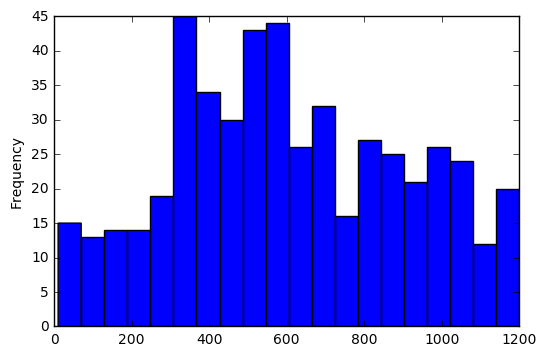

In [5]:
df["score"].plot(kind = "hist", bins = 20)
plt.show()

#### Variable: `grant`

In [6]:
df["grant"].describe()

count    500.000000
mean       0.504000
std        0.500485
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: grant, dtype: float64

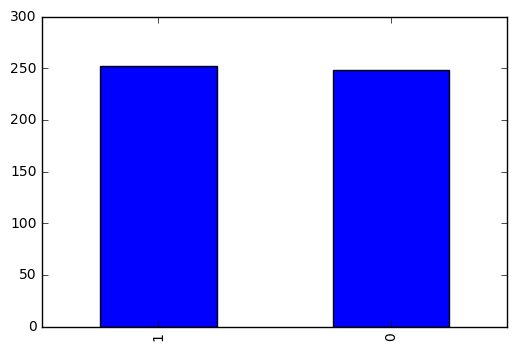

In [7]:
df["grant"].value_counts().plot(kind = 'bar')
plt.show()

**Note: Distribution is NOT Normal**

### Bivariate Analysis

#### Variables: `score` and `grant`

### Response by Predict Analysis

In [8]:
X = df[["score"]]
y = df["grant"]

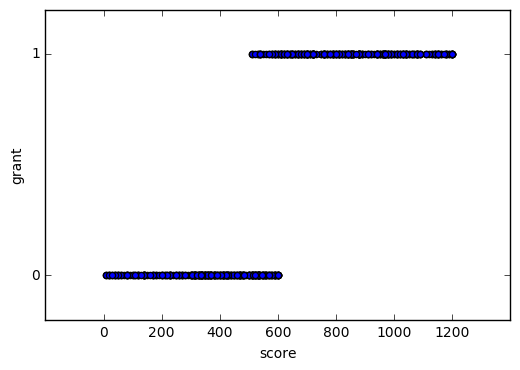

In [9]:
ax = plt.axes()
plt.scatter(X, y)
plt.xlabel("score")
ax.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
plt.ylabel("grant")
ax.set_yticks([0, 1])
plt.show()

### Modelling

#### Trying Linear Regression

In [10]:
df_model = linear_model.LinearRegression()
df_fit = df_model.fit(X, y)
df_fit.intercept_, df_fit.coef_

(-0.32469785248393979, array([ 0.00135794]))

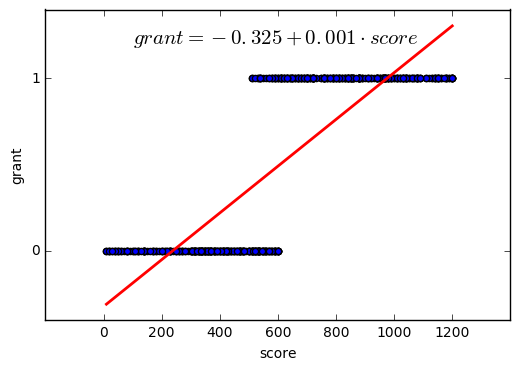

In [11]:
ax = plt.axes()
reg_x = range(int(floor(df["score"].min())), int(ceil(df["score"].max())) + 1)
reg_y = [df_fit.intercept_ + df_fit.coef_ * v for v in reg_x]
plt.scatter(X, y)
plt.plot(reg_x, reg_y, color = "red", linewidth = 2)
plt.text(100, 1.2, "$grant = %.3f + %.3f \\cdot score$" % (df_fit.intercept_, df_fit.coef_[0]), fontsize = 15)
plt.xlabel("score")
ax.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
plt.ylabel("grant")
ax.set_yticks([0, 1])
plt.show()

In [12]:
value = 590
df_fit.intercept_ + df_fit.coef_[0] * value

0.47648808951705068

In [13]:
value = [100, 990]
df_fit.intercept_ + df_fit.coef_ * value

array([-0.18890363,  1.019665  ])

### Log Odds or Logit Function

$$f(x) = logit(p) = log(odds) = log \left ( {p\over 1-p} \right ) \\ 0 \le p \le 1$$

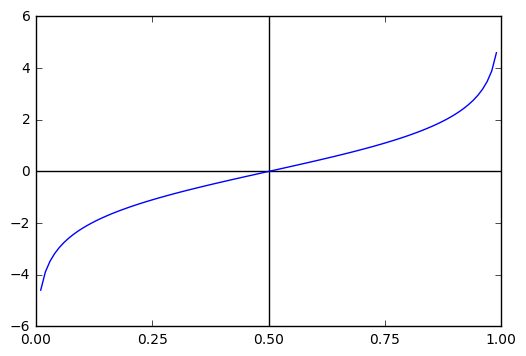

In [14]:
x = [i / 100.0 for i in range(1, 100)]
y = [log(p / (1 - p)) for p in x]
ax = plt.axes()
plt.plot(x, y)
plt.hlines(0, 0, 1, color = "black", linestyles = "solid")
plt.vlines(0.5, -6, 6, color = "black", linestyles = "solid")
ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.show()

### Sigmoid Function
**Inverse of the Logit function**
$$f(x) = sigmoid(x) = logit^{-1}(x) = {1 \over 1 + e^{-x}} = {e^x \over 1 + e^x} \\ -\infty \le x \le \infty$$

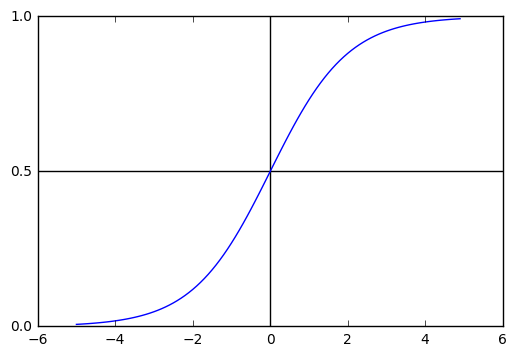

In [15]:
x = [i / 10.0 for i in range(-50, 50)]
y = [exp(p) / (1 + exp(p)) for p in x]
ax = plt.axes()
plt.plot(x, y)
plt.hlines(0.5, -6, 6, color = "black", linestyles = "solid")
plt.vlines(0, 0, 1, color = "black", linestyles = "solid")
ax.set_yticks([0, 0.5, 1])
plt.show()

In [16]:
X = df[["score"]]
y = df["grant"]

In [17]:
print("Coeficients for LINEAR Regression")
print(df_fit.intercept_, df_fit.coef_)
df_model = linear_model.LogisticRegression()
df_fit = df_model.fit(X, y)
print("Coeficients for LOGISTIC Regression")
print(df_fit.intercept_, df_fit.coef_)

Coeficients for LINEAR Regression
(-0.32469785248393979, array([ 0.00135794]))
Coeficients for LOGISTIC Regression
(array([-7.19642336]), array([[ 0.01250173]]))


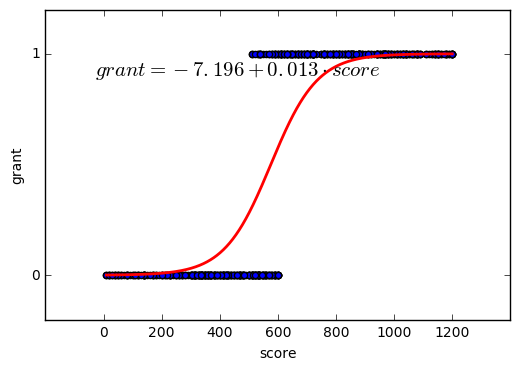

In [18]:
ax = plt.axes()
reg_x = range(int(floor(df["score"].min())), int(ceil(df["score"].max())) + 1)
reg_y = [exp(df_fit.intercept_ + df_fit.coef_ * v) / (1 + exp(df_fit.intercept_ + df_fit.coef_ * v)) for v in reg_x]
plt.scatter(X, y)
plt.plot(reg_x, reg_y, color = "red", linewidth = 2)
plt.text(-30, 0.9, "$grant = %.3f + %.3f \\cdot score$" % (df_fit.intercept_, df_fit.coef_[0]), fontsize = 15)
plt.xlabel("score")
ax.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
plt.ylabel("grant")
ax.set_yticks([0, 1])
plt.show()

In [19]:
value = 590
np.exp(df_fit.intercept_ + df_fit.coef_[0] * value) / (1 + np.exp(df_fit.intercept_ + df_fit.coef_[0] * value))

array([ 0.54477907])

In [20]:
value = [100, 990]
np.exp(df_fit.intercept_ + df_fit.coef_[0] * value) / (1 + np.exp(df_fit.intercept_ + df_fit.coef_[0] * value))

array([ 0.00260881,  0.9944051 ])

$$p(y)={e^{\alpha + \beta_1 x_1}\over 1 +e^{\alpha + \beta_1 x_1}}$$

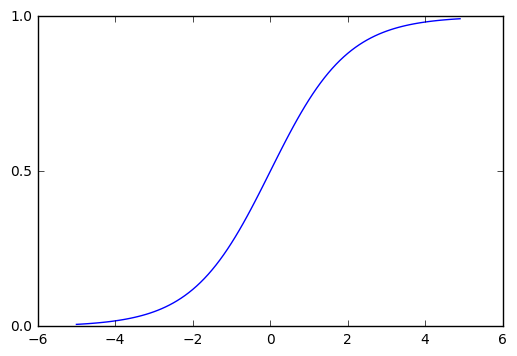

In [21]:
def prob(x):
    return exp(x) / (1 + exp(x))

x = [i / 10.0 for i in range(-50, 50)]
y = [prob(value) for value in x]
ax = plt.axes()
plt.plot(x, y)
ax.set_yticks([0, 0.5, 1])
plt.show()

$$odds(p(y))={p(y)\over 1-p(y)} ={{e^{\alpha + \beta_1 x_1}\over 1 +e^{\alpha + \beta_1 x_1}} \over 1 - \left ({e^{\alpha + \beta_1 x_1}\over 1 +e^{\alpha + \beta_1 x_1}}\right)}$$

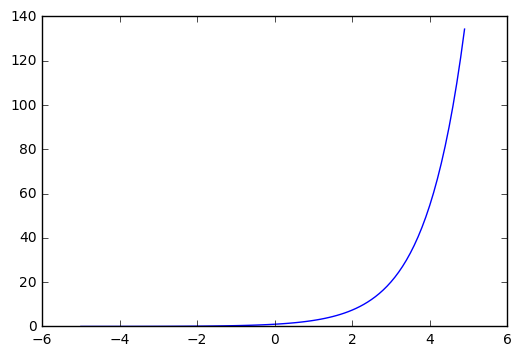

In [22]:
def odds(x):
    return prob(x) / (1 - prob(x))

x = [i / 10.0 for i in range(-50, 50)]
y = [odds(value) for value in x]
plt.plot(x, y)
plt.show()

$$log(odds(p(y)))=\alpha + \beta_1 x_1$$

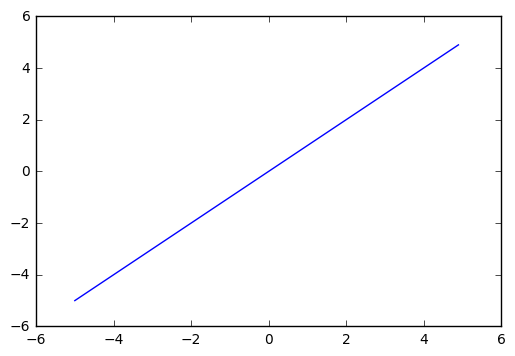

In [23]:
def logit(x):
    return log(odds(x))

x = [i / 10.0 for i in range(-50, 50)]
y = [logit(value) for value in x]
plt.plot(x, y)
plt.show()